In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('bmh')
pd.option_context('display.max_rows', 500, 'display.max_columns', 500)
pd.set_option('display.max_rows', 150)

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape


(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

From this initial information we can see that some features have missing values. Let's check how many missing values each feature has

In [5]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Alley, FireplaceQu, PoolQC, Fence, MiscFeature have a lot of missing values. Let's remove features with 30% or less Nan values

In [4]:
threshold = 0.3

df = df[[column for column in df if df[column].count() / len(df) >= 0.3]]


Lets check how the house price is distributed

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<AxesSubplot:xlabel='SalePrice'>

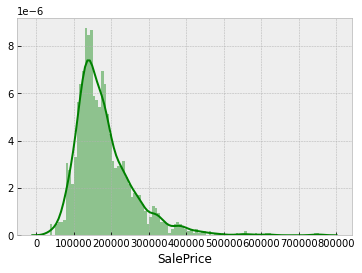

In [16]:
print(df['SalePrice'].describe())

sns.distplot(df['SalePrice'], color='g',bins=100, hist_kws={'alpha': 0.4})

"""
    With this information we can see that the prices are skewed right and some outliers lies
    above ~500,000
"""


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8c874ee358>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8c874ee908>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8c874ee0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8c874eeeb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8c874fe1d0>],
 'means': []}

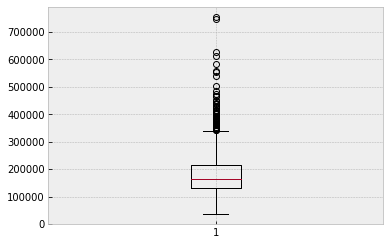

In [17]:
plt.boxplot(df['SalePrice'])

#### Numerical Data Distribution

Lets look at the distribution of all the features by ploting them


In [20]:
set(df.dtypes.tolist())

[dtype('O'), dtype('int64'), dtype('float64')]

In [5]:
df = df.drop('Id', axis=1)

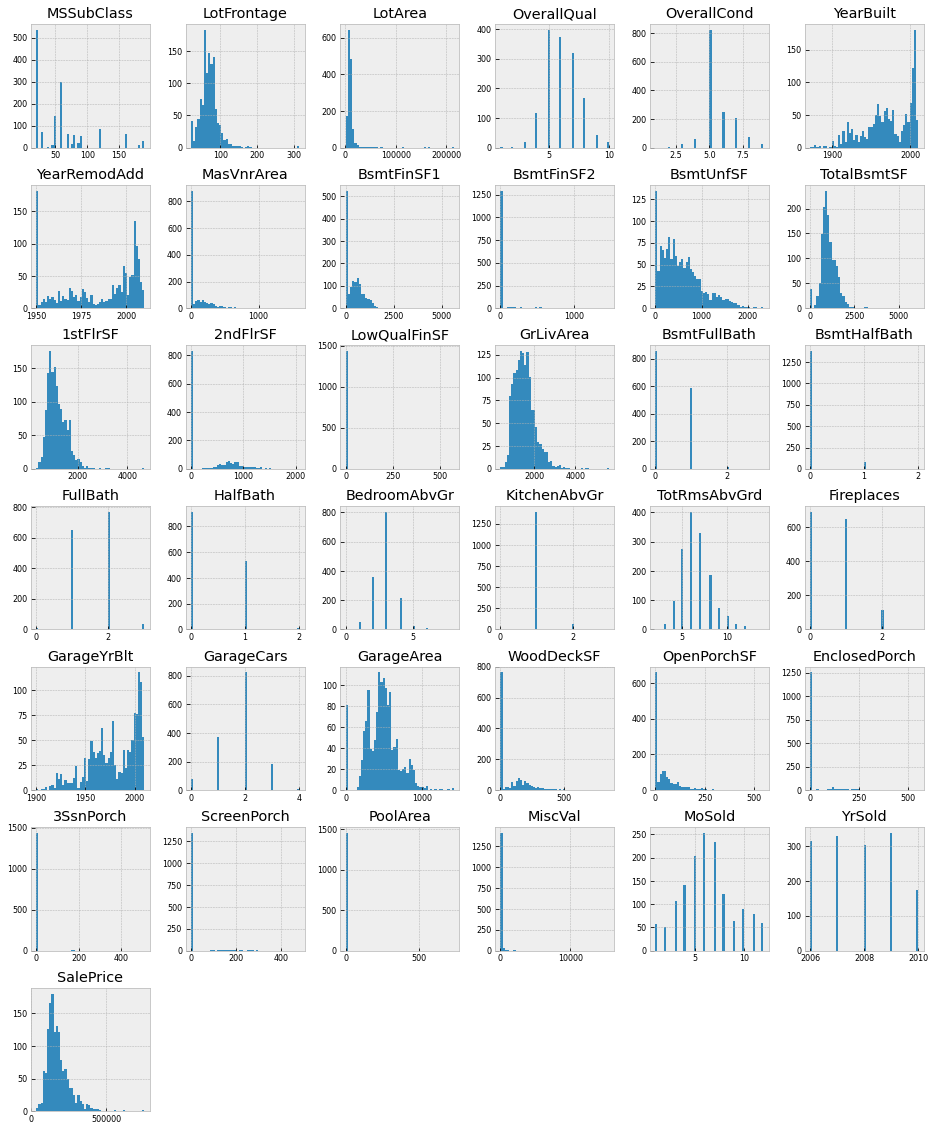

In [10]:

df_numeric = df.select_dtypes(include= ['float64', 'int64'])
df_numeric.hist(figsize=(16,20), bins=50,  xlabelsize=8, ylabelsize=8);

#### Correlation

In [11]:
df_corr = df_numeric.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
top_features = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)

print("Strongly correlated features with SalePrice:\n {}".format(top_features))


Strongly correlated features with SalePrice:
 OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


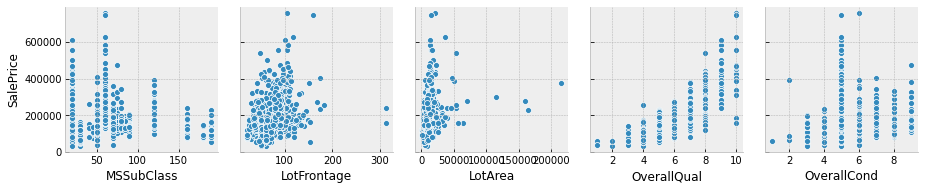

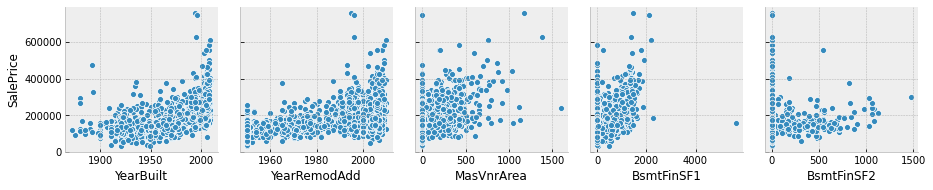

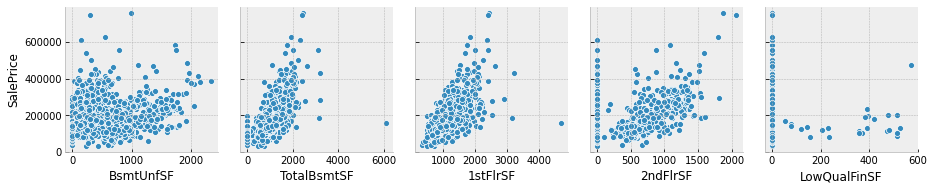

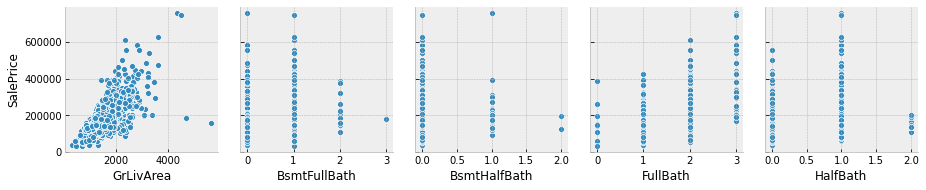

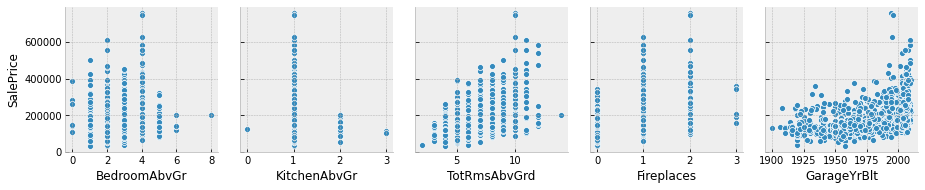

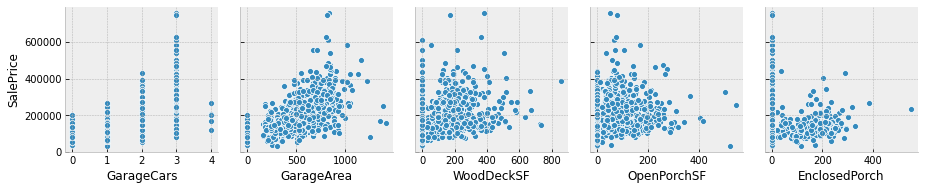

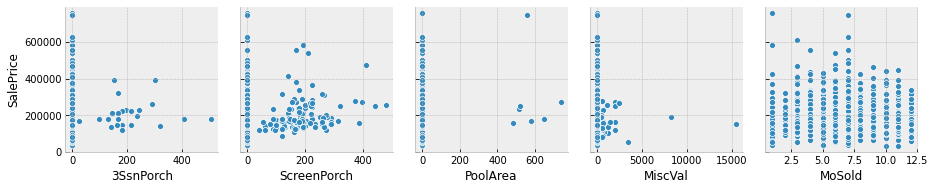

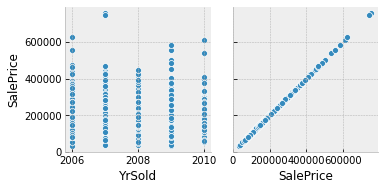

In [45]:
for i in range(0, len(df_numeric.columns), 5):
    sns.pairplot(data=df_numeric,
                x_vars=df_numeric.columns[i:i+5],
                y_vars=['SalePrice'])
    

[Text(0.5, 0, 'BedroomAbvGr')]

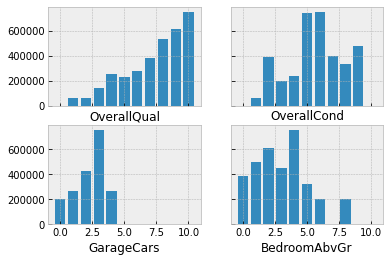

In [9]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
ax1.bar(df['OverallQual'].values, df['SalePrice'].values);
ax1.set(xlabel="OverallQual")
ax2.bar(df['OverallCond'].values, df['SalePrice'].values);
ax2.set(xlabel="OverallCond")

ax3.bar(df['GarageCars'].values, df['SalePrice'].values);
ax3.set(xlabel="GarageCars")

ax4.bar(df['BedroomAbvGr'].values, df['SalePrice'].values);
ax4.set(xlabel="BedroomAbvGr")

##### Feature to Feature Relationship

We can conclude that some features may be combined between each other in order to reduce the number of features => '1stFlrSF' / 'TotalBsmtSF' and 'GarageCars'/'GarageArea' (features with high correlation

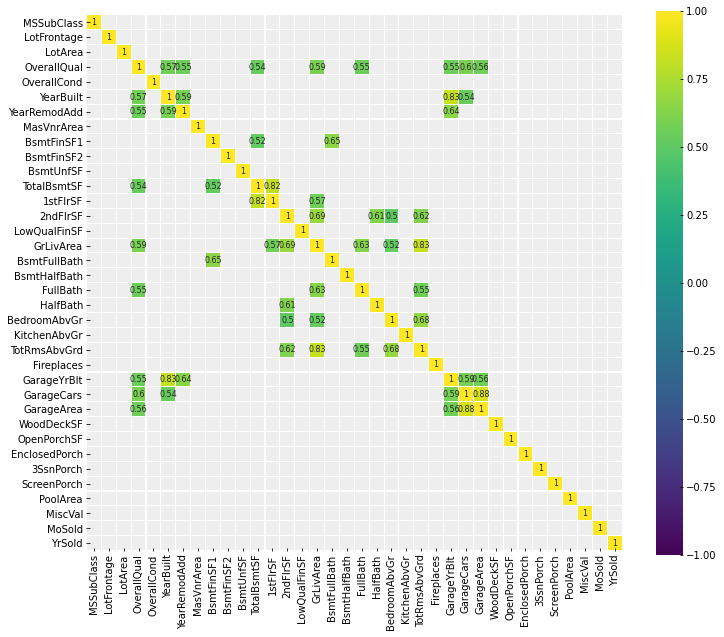

In [10]:
corr = df_numeric.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

#### Quantitative to Quantitative relationship
Chek how the quantitative features of our dataframe relate to SalePrice

In [7]:
quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
df_quantitative_values = df[quantitative_features_list]

In [12]:
feature_to_analyze = [x for x in quantitative_features_list if x in top_features]
feature_to_analyze.append('SalePrice')

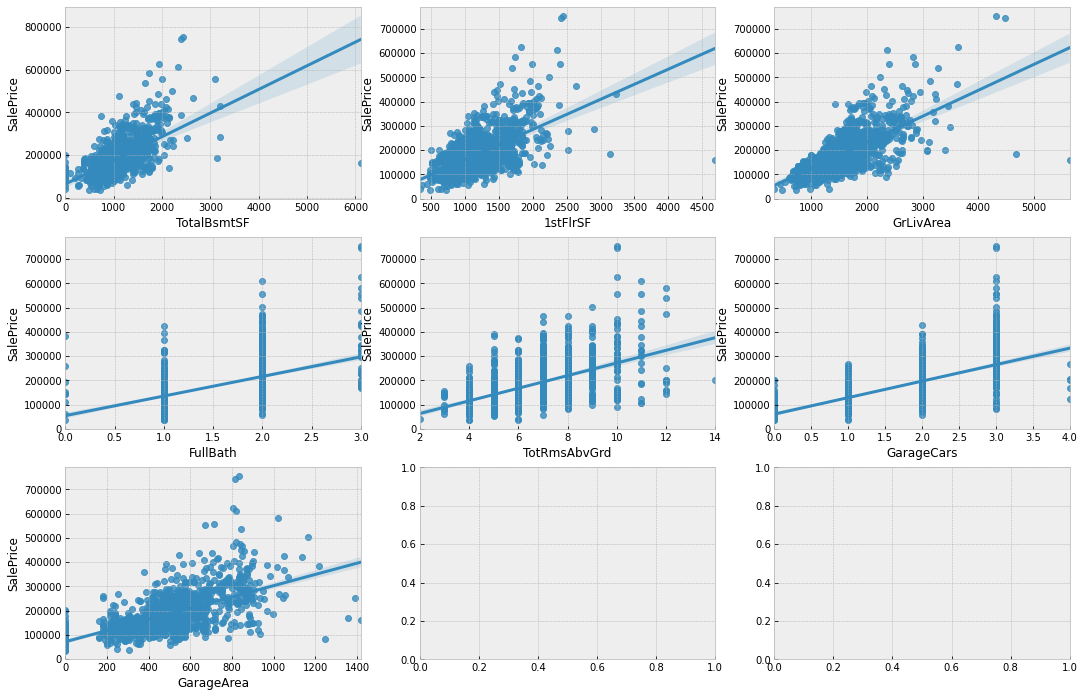

In [15]:
fig, ax = plt.subplots(round(len(feature_to_analyze) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(feature_to_analyze) - 1:
        sns.regplot(x=feature_to_analyze[i],y='SalePrice', data=df[feature_to_analyze], ax=ax);

####  Categorical Features


In [17]:
categorical_features = [a for a in quantitative_features_list[:-1] + df.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in df.columns.tolist())]
df_categ = df[categorical_features]
df_categ.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003.0,RFn,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976.0,RFn,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001.0,RFn,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998.0,Unf,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000.0,RFn,TA,TA,Y,12,2008,WD,Normal,250000


In [18]:
df_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 39 non numerical features including:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
